In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
today=datetime.today().strftime('%Y-%m-%d')

from tqdm import tqdm # progress apply :)
tqdm.pandas()

%load_ext autoreload
%autoreload 2
def d(l):
    pd.set_option('display.max_colwidth', l)

d(10)

In [3]:
# ensure that lists are read as list and not as strings
from ast import literal_eval
columns_to_convert=["texts","labels","retraction_counts","has_retraction","has_retraction_label"]
converters = {col: literal_eval for col in columns_to_convert}


#df=pd.read_csv("2025-04-02b PDF_import (docling - complete).csv",index_col=0, converters=converters)
#df["text"]=df["text"].apply(lambda x: " ".join(x))

#df=pd.read_json("2025-04-03 PDF Import complete.json")
df=pd.read_json("2025-06-06 PDF import filtered.json")

#df.dropna(subset="texts",inplace=True)

In [5]:
df2=pd.read_json("2025-06-06 Merged_Data.json")[["ID","Doi","Title","Date","Year", "contains_country"]]
df2.set_index("ID",inplace=True,drop=False)
df=df.join(df2,how="inner")

df.shape

(1016, 12)

In [7]:
df.drop_duplicates(subset="text")

,path,folder,journal,labels,retraction_counts,text,ID,Doi,Title,Date,Year,contains_country
Science113,Data_S...,Data_S...,Science,[capti...,"[0, 0,...","""It ju...",Scienc...,10.112...,Big st...,2020-06-12,2020,[]
Science116,Data_S...,Data_S...,Science,"[text,...","[0, 0,...","""Whatt...",Scienc...,10.112...,Genome...,2020-03-13,2020,[China...
Science119,Data_S...,Data_S...,Science,[secti...,"[0, 0,...",Withdr...,Scienc...,10.112...,Elsevi...,2010-03-12,2010,[South...
Science149,Data_S...,Data_S...,Science,"[text,...","[0, 0,...",The ep...,Scienc...,10.112...,The pr...,2017-09-29,2017,[Bulga...
Science159,Data_S...,Data_S...,Science,[secti...,"[0, 0,...",Suchcl...,Scienc...,10.112...,Vaccin...,2017-04-28,2017,[Unite...
...,...,...,...,...,...,...,...,...,...,...,...,...
Nature1223,Data_N...,Data_N...,Nature,[secti...,"[0, 0,...",Fuller...,Nature...,10.103...,Fuller...,1991-10-03,1991,[Japan...
Nature1358,Data_N...,Data_N...,Nature,[secti...,"[0, 0,...",130.La...,Nature...,10.103...,The in...,1987-01-15,1987,[]
Nature293,Data_N...,Data_N...,Nature,[page_...,"[0, 0,...",that t...,Nature293,10.103...,China ...,2018-06-08,2018,[China...
Nature507b,Data_N...,Data_N...,Nature,[secti...,"[0, 0,...",GM stu...,Nature...,10.103...,Seven ...,2013-12-04,2013,[China...


In [75]:
#df["text"]=df["texts"].apply(lambda x: "".join(x))

In [9]:
def find_matches(year_ranges , names, df):
    """
    Find matches in a DataFrame based on text containing specific names and years within a range.

    Parameters:
    - data: List of tuples where each tuple contains a year range and a list of names.
            Example: [((1979, 1981), ["Soman"]), ((1991, 1992), ["Baltimore"])]
    - df: A pandas DataFrame with 'text' and 'Year' columns.

    Returns:
    - A DataFrame of matches and the count of matches.
    """
    all_matches = pd.DataFrame()  # To store all matches
    for year_range in year_ranges:
        # Extract the start and end years from the range
        start_year, end_year = year_range

        # Filter rows where the year is within the range
        mask_year = df["Year"].apply(lambda x: start_year <= x <= end_year)

        for name in names:
            # Filter rows where the text contains the name
            mask_name = df["text"].apply(lambda x: isinstance(x, str) and name in x)

            # Combine the masks to find matches
            matches = df.loc[mask_year & mask_name, ["Year","text", "ID","Doi", "contains_country"]]
            matches["Name"]=name
            matches["year_range"]=str(year_range)
            # Append matches to the result DataFrame
            all_matches = pd.concat([all_matches, matches])

    # Drop duplicates in case of overlapping matches
   # all_matches = all_matches.drop_duplicates()

    print("COUNTS: ", all_matches.shape[0])
    return all_matches

RI_people=pd.read_csv("RI_people.csv")["name"]
RI_people=RI_people.to_list()
NERs=pd.read_excel("2025-04-30 NER_Person.xlsx")
NERs=NERs["ner_person"].to_list()
for i in [".","Dr.","Li","Prof."]:
    NERs.remove(i)

year_ranges = [
    (1980, 1982),
    (1988, 1990),
    (1991, 1993),
    (2001, 2003),
    (2005, 2007),
    (2011, 2013),
    (2013, 2015)]

# Run the function
matches = find_matches(year_ranges , NERs, df)

# Display the matches
#.to_excel("2025-04-30 Individual Cases.xlsx")


COUNTS:  1392


In [10]:
matches

,Year,text,ID,Doi,contains_country,Name,year_range
Science394,1982,Though...,Scienc...,10.112...,[],Soman,"(1980,..."
Science404,1981,Simpso...,Scienc...,10.112...,[Jorda...,Soman,"(1980,..."
Science406,1980,Grave ...,Scienc...,10.112...,[New Z...,Soman,"(1980,..."
Science407,1980,On 5 F...,Scienc...,10.112...,[India...,Soman,"(1980,..."
Nature1443,1981,The ch...,Nature...,10.103...,[],Soman,"(1980,..."
...,...,...,...,...,...,...,...
Nature511,2013,Report...,Nature511,10.103...,[],Francis,"(2013,..."
Nature414,2015,Teruo ...,Nature414,10.103...,[Japan...,Teruhi...,"(2013,..."
Nature463,2014,Davor ...,Nature463,10.103...,[Japan...,Teruhi...,"(2013,..."
Nature467,2014,A co-a...,Nature467,10.103...,[],Teruhi...,"(2013,..."


In [78]:



#matches.groupby("year_range").Name.apply(lambda x: x.value_counts()[:10]).to_excel("Years and cases big.xlsx")
import pandas as pd
max_n=10

# Assuming 'matches' is your DataFrame
result = matches.groupby("year_range").apply(
    lambda group: pd.DataFrame({
        'Name': group.Name.value_counts()[:max_n].index,
        'Count': group.Name.value_counts()[:max_n].values,
        'IDs': [group[group.Name == name].ID.tolist() for name in group.Name.value_counts()[:max_n].index],
        'DOIs': [group[group.Name == name].Doi.tolist() for name in group.Name.value_counts()[:max_n].index],
        'text': [group[group.Name == name].text.tolist() for name in group.Name.value_counts()[:max_n].index]

    })
).reset_index(level=0)

# Rename the columns for clarity
result.rename(columns={'level_0': 'year_range'}, inplace=True)
result.to_excel("Years and cases big.xlsx")

/var/folders/xb/hcrlz1px0q5byjc3wrssw2lm0000gn/T/ipykernel_33454/2641660052.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = matches.groupby("year_range").apply(


In [11]:
from itertools import combinations
# Initialize a dictionary to hold the overlaps
overlap_dict = {}

# Iterate through all combinations of names
for (name1, ids1), (name2, ids2) in combinations(zip(result['Name'], result['IDs']), 2):
    # Find the overlap of IDs
    overlap = set(ids1).intersection(set(ids2))
    overlap_count = len(overlap)
    
    # Only add to the dictionary if there is an overlap
    if overlap_count > 4:
        overlap_dict[(name1, name2)] = overlap_count
overlap_dict

NameError: name 'result' is not defined

In [13]:
matches[matches.year_range=='(1991, 1993)'].Name.value_counts()[:15]

Name
Baltimore                10
Imanishi-Kari             9
ImanishiKari              5
O'Toole                   5
Imanishi-Kari's           4
Margot O'Toole            4
Thereza Imanishi-Kari     4
Stewart                   3
Weaver                    3
David Baltimore           3
Ye                        3
Feder                     3
Dingell                   3
Woo                       2
Anderson                  2
Name: count, dtype: int64

In [15]:
find_names = [
    ((1977, 1985), ["Soman","Alsabti"]),
    ((1988, 1990), ["Fleischman"]),
    ((1990, 1995), ["Baltimore"]),
    ((2000, 2004), ["Schon"]),
    ((2005, 2008), ["Kawasaki", "Woo Suk"]),
    ((2010, 2014), ["Stapel", "Mikovits", "Yoshitaka", "Seralini","Boldt"]),
    ((2014, 2020), ["Obokata"])]



In [17]:
# Example data

import pandas as pd

def find_matches(data, df):
    """
    Find matches in a DataFrame based on text containing specific names and years within a range.

    Parameters:
    - data: List of tuples where each tuple contains a year range and a list of names.
            Example: [((1979, 1981), ["Soman"]), ((1991, 1992), ["Baltimore"])]
    - df: A pandas DataFrame with 'text' and 'Year' columns.

    Returns:
    - A DataFrame of matches and the count of matches.
    """
    all_matches = pd.DataFrame()  # To store all matches

    for year_range, names in data:
        # Extract the start and end years from the range
        start_year, end_year = year_range

        # Filter rows where the year is within the range
        mask_year = df["Year"].apply(lambda x: start_year <= x <= end_year)

        for name in names:
            # Filter rows where the text contains the name
            mask_name = df["text"].apply(lambda x: isinstance(x, str) and name in x.replace("é","e"))

            # Combine the masks to find matches
            matches = df.loc[mask_year & mask_name, ["Date", "text", "Doi", "contains_country"]]
            matches["Name"]=name
            # Append matches to the result DataFrame
            all_matches = pd.concat([all_matches, matches])

    # Drop duplicates in case of overlapping matches
   # all_matches = all_matches.drop_duplicates()

    print("COUNTS: ", all_matches.shape[0])
    return all_matches


# Run the function
matches = find_matches(find_names, df)

# Display the matches
matches.to_excel("2025-04-30 Individual Cases.xlsx")
matches.Name.value_counts()

COUNTS:  144


Name
Obokata       32
Woo Suk       19
Schon         13
Stapel        13
Baltimore     11
Mikovits      10
Soman          7
Fleischman     7
Kawasaki       7
Yoshitaka      7
Seralini       7
Boldt          6
Alsabti        5
Name: count, dtype: int64

In [19]:
matches

,Date,text,Doi,contains_country,Name
Science394,1982-01-29,Though...,10.112...,[],Soman
Science404,1981-04-10,Simpso...,10.112...,[Jorda...,Soman
Science406,1980-10-10,Grave ...,10.112...,[New Z...,Soman
Science407,1980-10-03,On 5 F...,10.112...,[India...,Soman
Nature1443,1981-04-09,The ch...,10.103...,[],Soman
...,...,...,...,...,...
Nature473,2014-05-14,Miscon...,10.103...,[Japan],Obokata
Nature483,2014-04-01,Nature...,10.103...,[China...,Obokata
Nature484,2014-03-27,But pr...,10.103...,[Japan],Obokata
Nature486,2014-03-18,primer...,10.103...,[Japan...,Obokata


In [21]:
matches[matches.Name=="Baltimore"]["text"].sum()[:100]

'The first phase of the 5-week hearing featured 3 weeks of testimony from both sides on the circumsta'

In [23]:
dfY = df[(df.Date > pd.Timestamp("1967-01-01")) & 
         (df.Date < pd.Timestamp("2023-01-01"))]
dfY.set_index('Date', inplace=True)

In [25]:
case_counts_by_year

NameError: name 'case_counts_by_year' is not defined

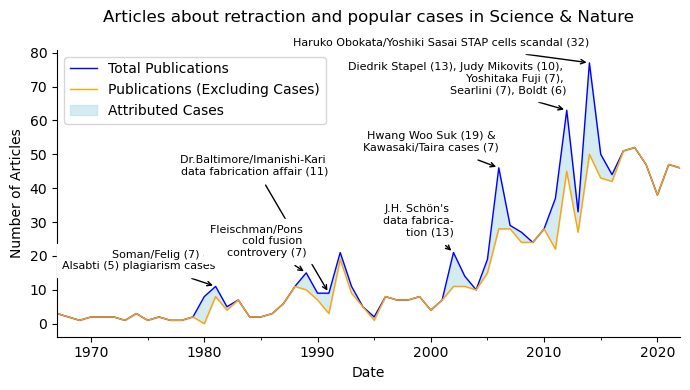

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `matches` DataFrame and `dfY` are already defined
# Group matches by year to calculate total cases per year

case_counts_by_year = matches.resample('YS', on='Date').size().reset_index(name='count') 
yearly_total_cases = case_counts_by_year.groupby('Date')['count'].sum().fillna(0)

# Resample `dfY` to get annual publication counts
annual_counts = dfY.resample('YS').Doi.size().fillna(0)

# Create a new time series by subtracting yearly_total_cases from annual_counts
# Align indices to ensure proper subtraction
yearly_total_cases = yearly_total_cases.reindex(annual_counts.index, fill_value=0)
adjusted_counts = annual_counts - yearly_total_cases


# Plot the data
fig, ax = plt.subplots(figsize=(7, 4))

# Plot the original publication counts
annual_counts.plot(ax=ax, linewidth=1, color='blue', label='Total Publications')

# Plot the adjusted counts (baseline)
adjusted_counts.plot(ax=ax, linewidth=1, color='orange', label='Publications (Excluding Cases)')

# Fill the area between the two lines
ax.fill_between(annual_counts.index, adjusted_counts, annual_counts, color='lightblue', alpha=0.5, label='Attributed Cases')

# Add annotations for specific years
annotations = {
    1981: "Soman/Felig (7) & \nAlsabti (5) plagiarism cases",
    1991: "Dr.Baltimore/Imanishi-Kari \ndata fabrication affair (11)",
    1989: "Fleischman/Pons \ncold fusion \ncontrovery (7)",
    2002: "J.H. Schön's \ndata fabrica-\ntion (13)",
    2006: "Hwang Woo Suk (19) & \nKawasaki/Taira cases (7)",
    2012: "Diedrik Stapel (13), Judy Mikovits (10), \nYoshitaka Fuji (7), \nSearlini (7), Boldt (6)",
    2014: "Haruko Obokata/Yoshiki Sasai STAP cells scandal (32)"
}

for year, text in annotations.items():
    # Get the value for the specific year
    value = annual_counts.loc[str(year)].iloc[0]

    
    k = 30 if year == 1991 else 0

    
    # Add annotation with an arrow
    plt.annotate(
        text, 
        xy=(pd.Timestamp(str(year)), value),
        xytext=(pd.Timestamp(str(year)), value + 5 + k),
        arrowprops=dict(facecolor='black', arrowstyle="->"),
        fontsize=8,
        backgroundcolor="w",
        ha='right'
    )

# Customize the plot
ax.set_ylabel("Number of Articles")
ax.set_title("Articles about retraction and popular cases in Science & Nature", pad=20)
ax.legend()

# Apply styling
sns.despine()
plt.tight_layout()

# Save the plot
plt.savefig(today+" article_Count_yearwise_filled_annotated.pdf")


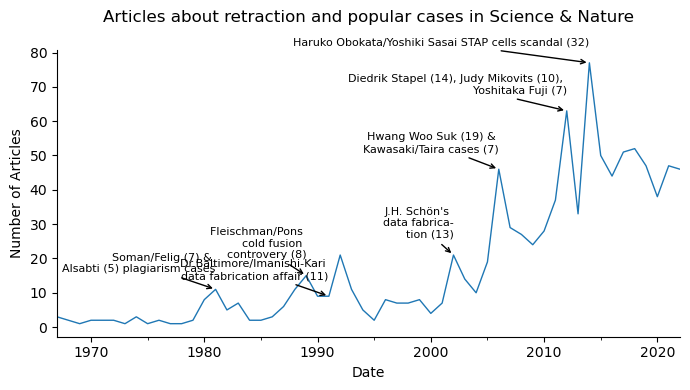

In [86]:
import matplotlib.pyplot as plt

# Assuming `annual_counts` is already defined as in your code
annual_counts = dfY.resample('YE').Doi.size().fillna(0)

# Plot the time series
ax=annual_counts.plot(linewidth=1, ylabel="Number of Articles", figsize=(7,4))


ax.set_title("Articles about retraction and popular cases in Science & Nature", pad=20)


for year, text in annotations.items():
    # Get the value for the specific year
    value = annual_counts.loc[str(year)].iloc[0]

    if year==1992:
        k=12
    else:
        k=0
    
    # Add annotation with an arrow
    plt.annotate(
        text, 
        xy=(pd.Timestamp(str(year)), value),  # Point to the year and its value
        xytext=(pd.Timestamp(str(year)), value + 5+k),  # Offset the text above the point
        arrowprops=dict(facecolor='black', arrowstyle="->"),
        fontsize=8,
        ha='right'
    )

# Save the plot
import seaborn as sns
sns.despine()
plt.tight_layout()

plt.savefig(today + " article_Count_yearwise_annotated.pdf")